**Q1. The name of student**

    Kaijing Zhang

**Q2. Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.)**

    In the process of doing research, I found that data visualization is very important. But when I drew some pictures, I didn't know how to start, so some of them didn't look very intuitive. I think my code can be improved in terms of visualization, .

**Q3. Any libraries that need to be installed to run your code (see above)**

    I don't use any Library outside of Anaconda Standard. I used Just Pandas, Matplotlib and Seaborn. 

**Q4. Anything else you feel is relevant to the grading of your project your project.**

    I don't think I've done a very good job of visualizing, but I can draw my own conclusions from the graph. If you don't understand anything, please read the comments.

**Q5. What did you set out to study?  (i.e. what was the point of your project?  This should be close to your Milestone 1 assignment, but if you switched gears or changed things, note it here.)**

    My research topic is whether the number of fans of a celebrity or the reason for his fame is related to the population of his hometown. I'll take the top 1000 celebrities on Instagram who can search for their hometown in the Wiki API. Then, search a third database for the population of that state based on those home states. In terms of population, this data contains a lot of data, so I can do some additional research. For example, compare a state's population in 2018 to its population in 2020. A state's population growth since 2010 is compared to its population growth after 2020. And the relationship between population and population density. 

**Q6. What did you Discover/what were your conclusions (i.e. what were your findings?  Were your original assumptions confirmed, etc.?)**

    What I found was that the most famous celebrities were all from places with relatively small populations. This conclusion is actually contrary to my original hypothesis. After doing some research and thinking, I think this conclusion may be because people born in small places will try harder to make themselves famous. In other words, they will try harder in life.
    
    To be more specific, I found that the number of fans of celebrities may be high or low in 2020, if not very high, in the state where they were born, as well as the rate of growth in 2020. But some of the celebrities with the biggest following were born in states with lower population and growth rates. This is consistent with the conclusion I made above. The detailed research process can be referred to the scatter diagram.
    
    I also looked at the three main topics in the celebrity community that were music, fashion and modeling. For this conclusion, please refer to pie chart below.
    
    Population density has nothing to do with the proportion of the population in the United States as a whole. However, I found that the top 10 states in the United States had high population density through the bar chart.
    
    The 2018 population trend is the same as the 2020 population trend. They're linear. And their correlation coefficient is 0.9998700040252946. The 2010 census also showed the same trends as the 2020 census. They're linear. And their correlation coefficient is 0.9971566432002299. I drew two linear regressions to represent them.
    
    When I looked at the 2020 population growth rates of the top 10 STATES and the growth rates since 2010, I found that New York had changed a lot. In New York state, the population declined in 2020, but overall, it has increased since 2010. In Illinois, both results have been in decline. This conclusion can be seen in the superimposed bar chart below.

**Q7. What difficulties did you have in completing the project?**

    One of the biggest difficulties encountered in this project was data visualization. Since there is no foundation for this, a lot of work has to be done before visualization can be done. In addition, the process of crawling data is also very difficult. The first step is to understand the structure of the site, and then to know which part of the data you want to crawl. Finally, it is necessary to crawl the data in a targeted way. Learning about apis is also a fun way to get open data from different companies.
    
    In addition, when I was doing Milestone3, I found that the data I got from Milestone2 needed to be cleaned up. Some of these elements are strings, and I have to convert them to numbers. Or some elements that are not in the right format need to be handled. This process is not so simple if you operate in DataFrame.

**Q8. What skills did you wish you had while you were doing the project?**

    In the process of doing this project, I want to have a stronger ability to write code. In the code can be written directly, rather than to refer to the materials to learn, you can complete the part you want to complete.

**Q9. What would you do “next” to expand or augment the project?**

    I will probably look for more relevant data to expand this data network. Find more relationships between features. And then use better visualizations to show my research results on these data. If modified on the basis of this project, I think I will improve the visual image. 

In [1]:
import pandas as pd

insdf = pd.read_csv('data/ins.csv')
borndf = pd.read_csv('data/born.csv')
usdf = pd.read_csv('data/us_states.csv')
# Reload three dataset into pandas Dataframe


In [2]:
insdf['name'] = insdf['name'].str.lower()
insdf['engagement rate'] = pd.to_numeric(insdf['engagement rate'].str.replace('%',''))
insdf['topics'] = insdf['topics'].str.replace(' ','').str.replace(']','').str.replace('[','').str.replace('\'','').str.split(',')
insdf.head()
# Data Clean for insdf
                                

,id,name,country,topics,followers,engagement rate
0,1,national geographic,United States,"[Photography, Travel, Nature]",145800000.0,0.1
1,2,jennifer lopez,United States,"[Modeling, Music, Singer]",132800000.0,0.8
2,3,katy perry,United States,[Singer],107800000.0,0.2
3,4,ellen,United States,"[TVShows, Comedy, Actors]",92300000.0,0.1
4,5,cardivenom,United States,"[Singer, Hair&Beauty, Fashion, Celebrities, Te...",77100000.0,4.4


In [3]:
borndf['Name'] = borndf['Name'].str.lower()
borndf['Born'] = borndf['Born'].str.lower()
borndf.head()
# Data Clean for borndf


,Name,Born,Website
0,national geographic,"washington, d.c.[4]",https://en.wikipedia.org/wiki/National_Geographic
1,jennifer lopez,"jennifer lynn lopez (age 51)new york city, u.s.",https://en.wikipedia.org/wiki/Jennifer_Lopez
2,katy perry,katheryn elizabeth hudson (age 36)santa barbar...,https://en.wikipedia.org/wiki/Katy_Perry
3,victoria's secret,"3 limited parkway, columbus, ohio, u.s.",https://en.wikipedia.org/wiki/Victoria%27s_Secret
4,nasa,"washington, d.c.38°52′59″n 77°0′59″w﻿ / ﻿38.88...",https://en.wikipedia.org/wiki/NASA


In [4]:
usdf['State'] = usdf['State'].str.lower()
usdf['2020 Pop'] = pd.to_numeric(usdf['2020 Pop'].str.replace(',',''))
usdf['2018 Pop'] = pd.to_numeric(usdf['2018 Pop'].str.replace(',',''))
usdf['2010 Census'] = pd.to_numeric(usdf['2010 Census'].str.replace(',',''))
usdf['2020 Growth'] = pd.to_numeric(usdf['2020 Growth'].str.replace('%',''))
usdf['Growth Since 2010'] = pd.to_numeric(usdf['Growth Since 2010'].str.replace('%',''))
usdf['% of US'] = pd.to_numeric(usdf['% of US'].str.replace('%',''))
usdf['Density (p/mi²)'] = pd.to_numeric(usdf['Density (p/mi²)'].str.replace(',',''))
usdf.head()
# Data Clean for usdf


,Rank,State,2020 Pop,2020 Growth,2018 Pop,2010 Census,Growth Since 2010,% of US,Density (p/mi²)
0,1,california,39937500,0.96,39557000,37320900,7.01,11.94,256
1,2,texas,29472300,2.68,28701800,25242700,16.76,8.81,113
2,3,florida,21993000,3.26,21299300,18845800,16.70,6.58,410
3,4,new york,19440500,-0.52,19542200,19400100,0.21,5.81,413
4,5,pennsylvania,12820900,0.11,12807100,12711200,0.86,3.83,287


In [5]:
'''
Get a state: postal-code dictionary from a website and help me to do next steps
'''

# url = 'https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes'
# df = pd.read_html(url)[0]
# adict = df.set_index(['Postal Code'])['State/District'].to_dict()   
# adict['PR'] = 'Puerto Rico'
# adict


'\nGet a state: postal-code dictionary from a website and help me to do next steps\n'

In [6]:
adict = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
         'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'DC': 'District of Columbia',
         'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois',
         'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana',
         'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota',
         'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
         'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina',
         'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania',
         'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
         'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin',
         'WY': 'Wyoming', 'PR': 'Puerto Rico'}


st = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
      "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", 
      "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", 
      "NC", "ND", "OH", "OK", "OR", "PA", "PR", "RI", "SC", "SD", "TN", 
      "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
states = usdf.loc[:,'State'].tolist()

res = dict()
for row in borndf.itertuples():
    place = row.Born
    for key, value in adict.items():
        if key.lower() in place or value.lower() in place:
            res[row.Name] = value.lower()
            break

research_df = pd.DataFrame({'Name': list(res.keys()), 'State':list(res.values())})
research_df['Followers'] = ''
research_df['2020 Pop'] = ''
research_df['2020 Growth'] = ''
for tup in research_df.itertuples():
    ins = insdf[insdf['name'] == tup[1]]
    us = usdf[usdf['State'] == tup[2]]
    research_df.loc[tup[0],'Followers'] = ins.iloc[:, 4].values[0]
    research_df.loc[tup[0],'2020 Pop'] = us.iloc[:,2].values[0]
    research_df.loc[tup[0],'2020 Growth'] = us.iloc[:,3].values[0]
research_df.head()
# Combine three datasets and conclude the result


,Name,State,Followers,2020 Pop,2020 Growth
0,national geographic,hawaii,1.458e+08,1412690,-0.55
1,jennifer lopez,nebraska,1.328e+08,1952570,1.21
2,katy perry,alabama,1.078e+08,4908620,0.42
3,victoria's secret,arkansas,6.87e+07,3039000,0.84
4,nasa,colorado,6.11e+07,5845530,2.63


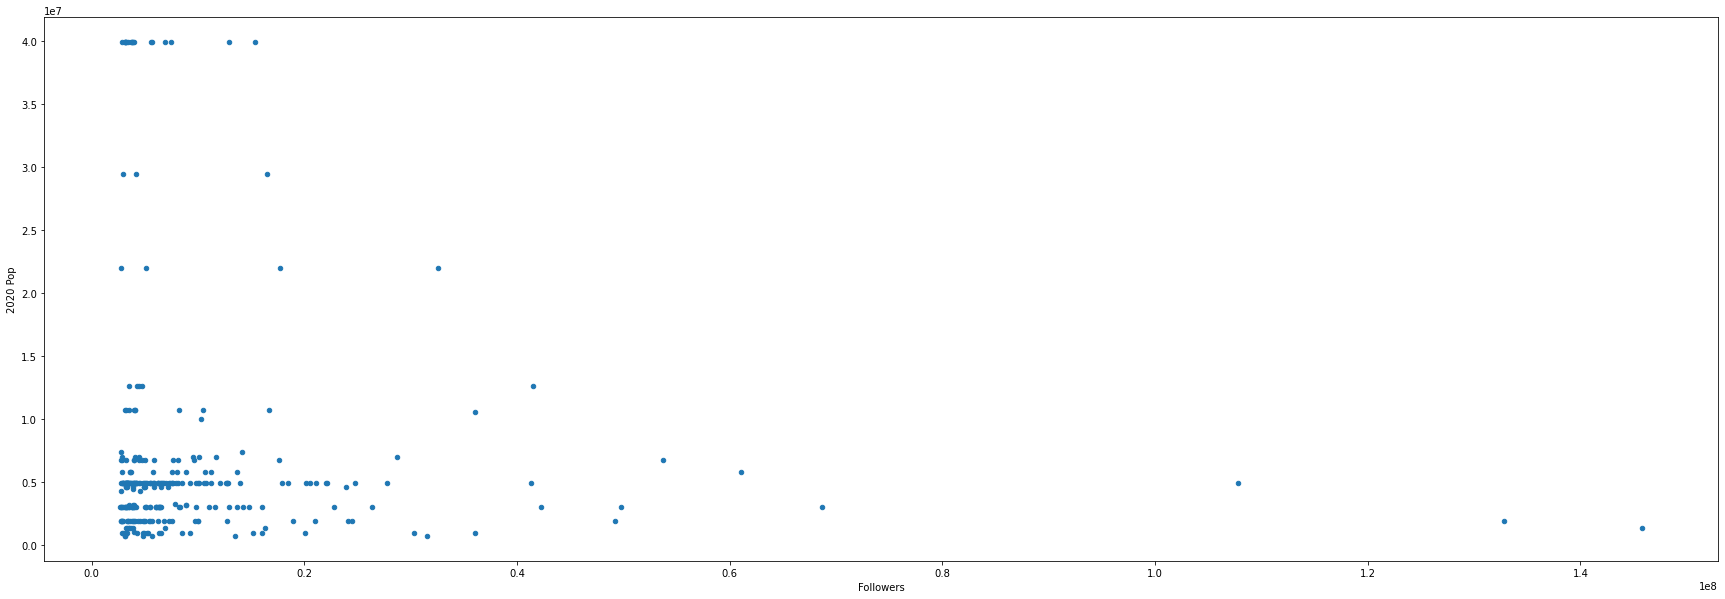

In [7]:
research_df.plot(kind='scatter', x='Followers', y='2020 Pop', figsize = (30, 10))
# The relationship between the number of followers of famous and the population of their born states

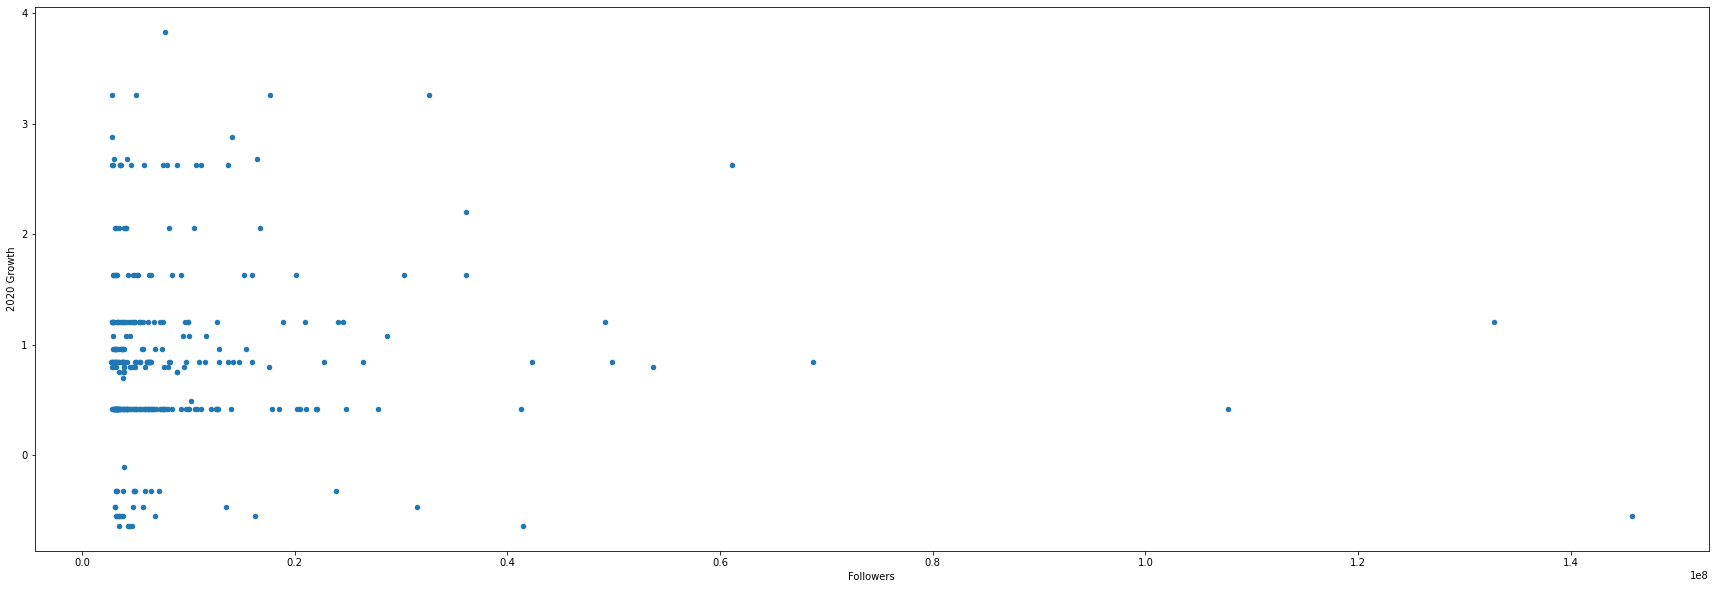

In [8]:
research_df.plot(kind='scatter', x='Followers', y='2020 Growth', figsize = (30, 10))
# The relationship between the number of followers of famous and the population growth

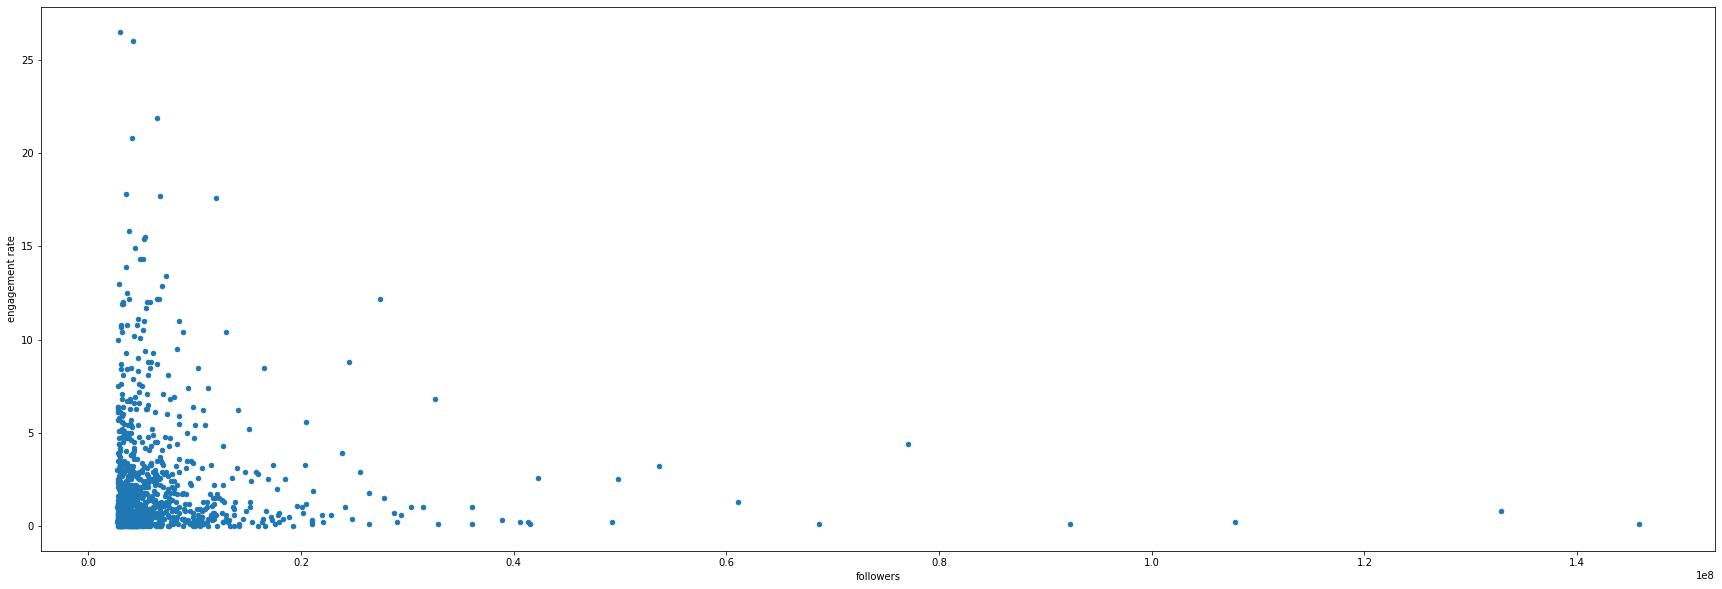

In [9]:
insdf.plot(kind='scatter', y='engagement rate', x='followers', figsize = (30, 10))
# The relationship between the engagement rage of follwers and the number of followers

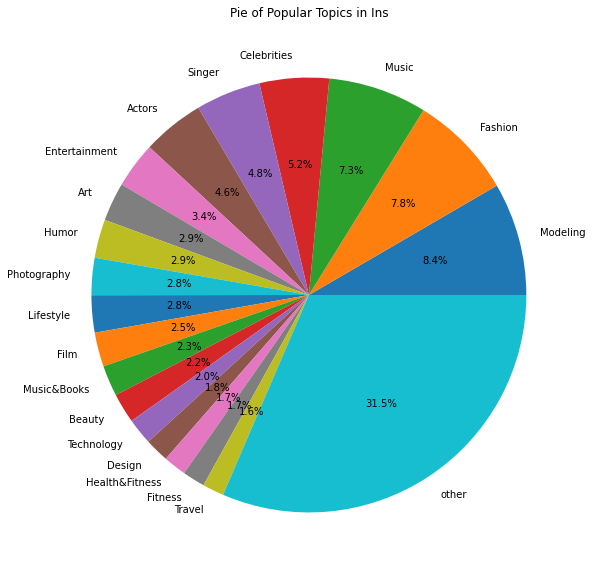

In [10]:
import matplotlib.pyplot as plt
cdict = dict()
for tup in insdf.itertuples():
    for item in tup[4]:
        if item not in cdict.keys():
            cdict[item] = 1
        else:
            cdict[item] += 1

a1 = sorted(cdict.items(),key = lambda x:x[1],reverse = True)
alist1 = []
alist2 = []
for item in a1[:19]:
    alist1.append(item[0])
    alist2.append(item[1])
count = 0
for item in a1[19:]:
    count += item[1]
alist1.append('other')
alist2.append(count)
plt.figure(figsize=(10, 10))
plt.pie(alist2,labels=alist1,autopct='%1.1f%%',shadow=False)
plt.title("Pie of Popular Topics in Ins")
plt.show()
# The rate of topics that the top popular famous focus on


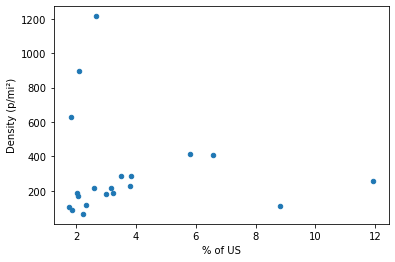

In [11]:
# Density (p/mi²)
usdf.head(20).plot.scatter(x='% of US',y='Density (p/mi²)')
plt.show()
# The relationship between population rate of each state in US and their density. 


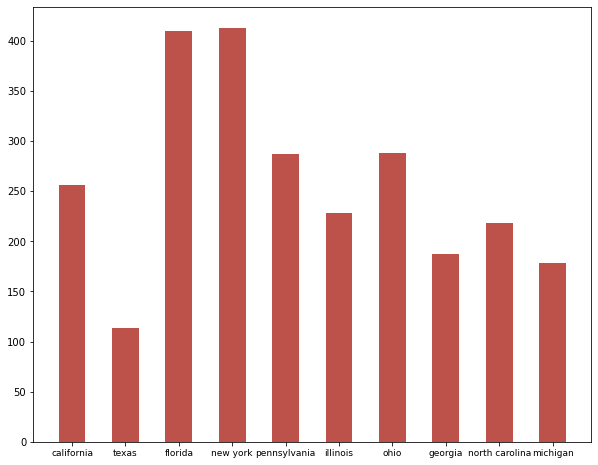

In [12]:
newdf = usdf.head(10)
state_list = newdf['State'].to_list()
density = newdf['Density (p/mi²)'].to_list()
x = range(len(density))
plt.figure(figsize=(10, 8))
plt.bar(x, density, width=0.5, color='#BC524A', label="density")
plt.xticks(x, state_list, size=9)
plt.show()
# The Density for top 10 states. 

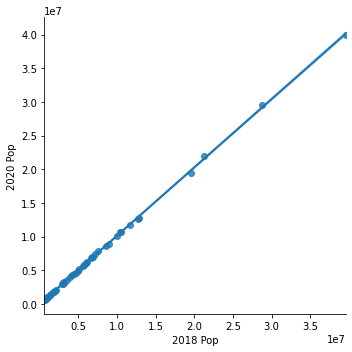

In [13]:
import seaborn as sns
sns.lmplot(x='2018 Pop', y='2020 Pop', data=usdf, fit_reg=True)
# The regression line about 2018 population and 2020 population

In [14]:
usdf['2018 Pop'].corr(usdf['2020 Pop'])
# The correlation coefficient for the line above

0.9998700040252946

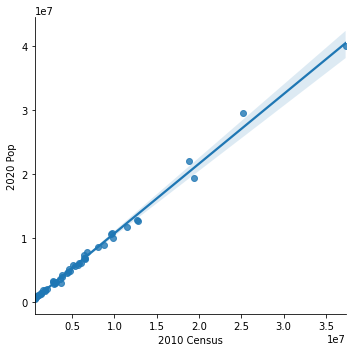

In [15]:
sns.lmplot(x='2010 Census', y='2020 Pop', data=usdf, fit_reg=True)
# The regression line about 2010 Census and 2020 population

In [16]:
usdf['2010 Census'].corr(usdf['2020 Pop'])
# The correlation coefficient for the line above

0.9971566432002299

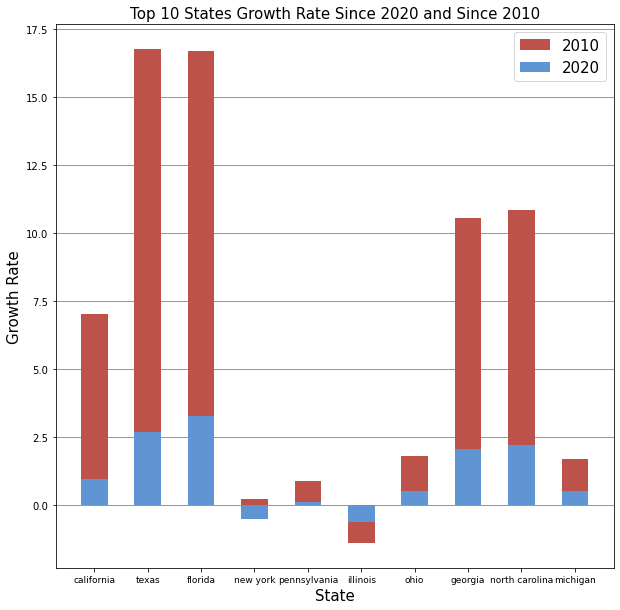

In [17]:
grow20 = newdf['2020 Growth'].to_list()
growsince10 = newdf ['Growth Since 2010'].to_list()
x = range(len(grow20))

width = 0.5
plt.figure(figsize=(10, 10))
plt.grid(axis="y", c='gray', linestyle='-')
rects2 = plt.bar(x, growsince10, width=width, color='#BC524A', label="2010", zorder=4)
rects1 = plt.bar(x, grow20, width=width, color='#5F95D3', label="2020", zorder=4)
size = 15
plt.xlabel('State', size=size)
plt.ylabel('Growth Rate', size=size)
plt.xticks(x, state_list, size=9)
plt.title("Top 10 States Growth Rate Since 2020 and Since 2010", size=size)
plt.legend(prop={'size': size}, bbox_to_anchor=(1, 1))
plt.show()
# The growth rate since 2020 and 2010 for top 10 states 
